In [1]:
# Standard
import os
import sys

# Third-party
import numpy as np


import f3dasm
from f3dasm.design import ExperimentData
from f3dasm.simulation.cases.flower_rve import FlowerRVE
from matplotlib import pyplot as plt 

2023-03-28 18:14:57.269011: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-28 18:14:57.357437: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
N = 2  # number of samples

# define the doe
C1 = f3dasm.ContinuousParameter(
    name="C1", lower_bound=0.05, upper_bound=0.3
)
C2 = f3dasm.ContinuousParameter(
    name="C2", lower_bound=0.05, upper_bound=0.3
)
# define the output
stress = f3dasm.ContinuousParameter(name="stress")
strain = f3dasm.ContinuousParameter(name="strain")

design = f3dasm.DesignSpace(
    input_space=[C1, C2], output_space=[stress, strain]
)

sampler = f3dasm.sampling.LatinHypercube(design=design, seed=1)
data = sampler.get_samples(numsamples=N)
print(data.data)

      input           output       
         C1        C2 stress strain
0  0.102128  0.212792    NaN    NaN
1  0.175014  0.140041    NaN    NaN


In [3]:
# initialize the simulation
problem = FlowerRVE()
problem.update_sim_info(print_info=True)

Simulation information: 

{
    "job_name": "flower_rve",
    "MAT_Name": "Arruda",
    "C1": 0.2,
    "C2": 0.1,
    "platform": "ubuntu"
}


In [4]:
results = problem.run_f3dasm(data=data)
print(results.data)

/home/jiaxiangyi/Documents/F3DASM/notebooks/tutorials/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.005119 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<11 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/F3DASM/notebooks/tutorials/Data/case_1
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.004571 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<11 out of 30 licenses remain available>.


      input                                                       output  \
         C1        C2                                             stress   
0  0.102128  0.212792  [[[0.0, 0.0], [0.0, 0.0]], [[1.808772329081546...   
1  0.175014  0.140041  [[[0.0, 0.0], [0.0, 0.0]], [[1.817887701920656...   

                                                      
                                              strain  
0  [[[0.0, 0.0], [0.0, 0.0]], [[0.006228170242272...  
1  [[[0.0, 0.0], [0.0, 0.0]], [[0.006228170242272...  


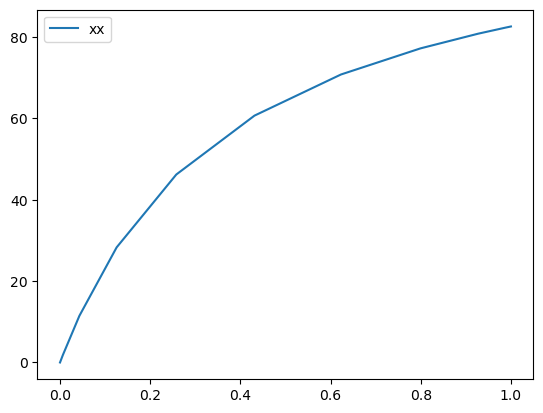

In [7]:
fig, ax = plt.subplots()
ax.plot(results.data[('output','strain')][0][:,0,0], results.data[('output','stress')][0][:,0,0], label='xx')
# ax.plot(results.data[('output','strain')][0][:,0,1], results.data[('output','stress')][0][:,0,1], label='xy')
# ax.plot(results.data[('output','strain')][0][:,1,1], results.data[('output','stress')][0][:,1,1], label='yy')
ax.legend()
plt.show()